In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
# from .feature_utils import time_domain_features
# from .mahalanobis_distance import mahalanobis_distance

import torch.nn as nn
import torch.utils.model_zoo as model_zoo
import torch
from math import pi
import torch.nn.functional as F

In [3]:
combined_data = pd.DataFrame(columns=["小時", "分", "秒", "毫秒", "垂直加速度", "水平加速度"])

data_list = []
folder_name = './viberation_dataset/Learning_set/Bearing1_1/'
files = [file for file in sorted(os.listdir(folder_name)) if 'acc' in file]
print(len(files))


2803


In [4]:
mode = 0

for file in files :
    df = pd.read_csv(f'{folder_name}/{file}', header=None)
    df = df.drop(5, axis=1)
    if mode == 1 : # step(100)
        df = df.iloc[::100, :]
    elif mode == 2 : # max num
        index = df.iloc[:, -1].argmax()
        df = df.iloc[index, :].to_frame().T
    else: # all
        pass

    data_list += df.values.tolist()
    
data = np.array(data_list)

In [6]:
print(type(data))
print(data.shape)
print(data[:15])

<class 'numpy.ndarray'>
(7175680, 5)
[[ 9.0000e+00  3.9000e+01  3.9000e+01  6.5664e+04  5.5200e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.5703e+04  5.0100e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.5742e+04  1.3800e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.5781e+04 -4.2300e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.5820e+04 -8.0200e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.5859e+04 -3.6400e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.5898e+04  3.2600e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.5937e+04  8.7400e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.5976e+04  8.8500e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.6015e+04  2.5700e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.6054e+04 -3.8800e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.6093e+04 -6.0200e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.6132e+04  6.0000e-03]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.6171e+04  5.5700e-01]
 [ 9.0000e+00  3.9000e+01  3.9000e+01  6.6210e+04  2.9700e-01]]


0       0.552
1       0.501
2       0.138
3      -0.423
4      -0.802
        ...  
2555    0.044
2556   -0.456
2557   -0.885
2558   -0.230
2559   -0.134
Name: 4, Length: 2560, dtype: float64


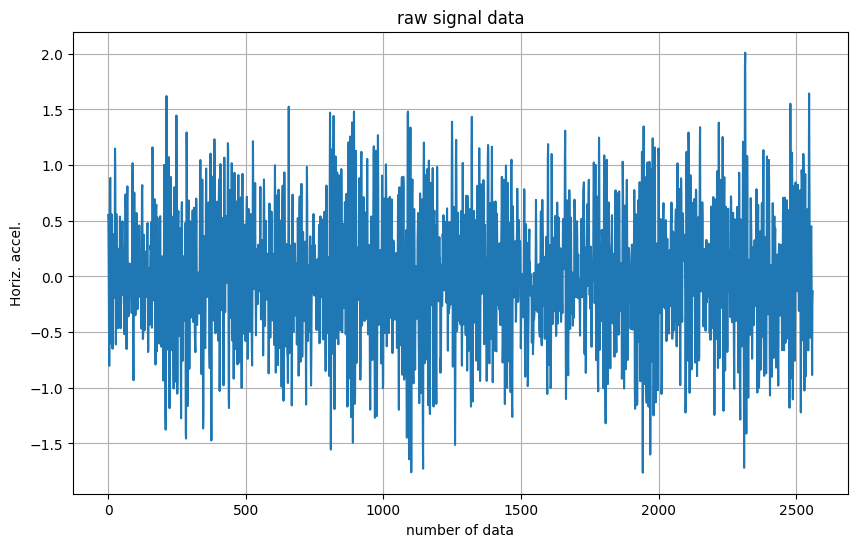

In [12]:
df_hrz = pd.read_csv(f'{folder_name}/{files[0]}', header=None)
# print(df_hrz[4])
hrz_a = df_hrz[4]
print(hrz_a)

plt.figure(figsize=(10, 6))
plt.plot(hrz_a)
plt.xlabel('number of data')
plt.ylabel('Horiz. accel.')
plt.title('raw signal data')
plt.grid(True)
plt.show()

In [ ]:
hrz_data_list = []

for file in files:
    df_hrz = pd.read_csv(f'{folder_name}/{file}', header=None)
    df_hrz = df_hrz[4]
    
